In [ ]:
!sudo pip uninstall tensorflow

Found existing installation: tensorflow 1.12.0
Uninstalling tensorflow-1.12.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-1.12.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.12.0


In [ ]:
!pip uninstall keras

Found existing installation: Keras 1.2.0
Uninstalling Keras-1.2.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras-1.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras/*
Proceed (y/n)? y
  Successfully uninstalled Keras-1.2.0


In [ ]:
!pip install keras==1.0

     |████████████████████████████████| 108 kB 7.9 MB/s 
  Created wheel for keras: filename=Keras-1.0.0-py3-none-any.whl size=130498 sha256=7c277cbd66c61c5564e46d81ab7e86e0f52c7ef50efb344808dcb56515df8dc2
  Stored in directory: /root/.cache/pip/wheels/b3/2c/5d/05f97a2a95bab04657f01b979b1c8cffead1da5d8a5e6e7b62
Successfully built keras


In [ ]:
!pip install tensorflow-gpu==1.15 

     |████████████████████████████████| 411.5 MB 7.4 kB/s 
     |████████████████████████████████| 503 kB 41.4 MB/s 
     |████████████████████████████████| 3.8 MB 50.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.12.2
    Uninstalling tensorboard-1.12.2:
      Successfully uninstalled tensorboard-1.12.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy.io import wavfile

def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [ ]:
import librosa

In [ ]:
import glob,pickle
for file in tqdm(glob.glob('/content/drive/MyDrive/leadindia_apeech/data/archive/**/*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'/content/drive/MyDrive/speech-emotion/data'+str(file_name), rate=rate,data=signal[mask])

In [ ]:
#All the cleaned Audio Files saved into Final_Cleaned_Dataset folder
import glob,pickle
for file in tqdm(glob.glob('/content/drive/MyDrive/leadindia_apeech/data/archive/**/*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'/content/drive/MyDrive/speech-emotion/data/'+str(file_name), rate=rate,data=signal[mask])


100%|██████████| 1440/1440 [04:02<00:00,  5.93it/s]


In [41]:
import librosa

In [42]:
import time
import os
import numpy as np

path="/content/drive/MyDrive/speech-emotion/data"

lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:

        X, sr = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 

        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
    
      except ValueError:
        continue

print("Time taken : %s minutes " % ((time.time() - start_time)/60))

Time taken : 0.5767961700757345 minutes 


In [43]:
mfcc, emotions = zip(*lst)

In [44]:
import pandas as pd

In [45]:
audio_df = pd.DataFrame(emotions)
audio_df = audio_df.replace({0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fear', 6:'disgust', 7:'surprise'})

In [46]:
mfcc = np.asarray(mfcc)
emotions = np.asarray(emotions)

In [47]:
from sklearn.model_selection import train_test_split

mfcc_train, mfcc_test, emotions_train, emotions_test = train_test_split(mfcc,emotions, test_size=0.20, random_state=42)

In [48]:
import numpy as np

mfcc_train = np.expand_dims(mfcc_train, axis=2)
mfcc_test = np.expand_dims(mfcc_test, axis=2)

In [ ]:
!pip install keras

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.0


In [ ]:
!pip install tensorflow

  Using cached tensorflow-2.8.0-cp37-cp37m-manylinux2010_x86_64.whl (497.5 MB)


In [49]:

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.utils.np_utils import to_categorical
from keras import optimizers

from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [50]:
model = Sequential()

model.add(Conv1D(64, 5,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
dir(keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(mfcc_train, emotions_train, batch_size=16, epochs=200, validation_data=(mfcc_test, emotions_test))


Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
71/72 [============================>.] - ETA: 0s - loss: 4.0223 - accuracy: 0.1338WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff4061ad9e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

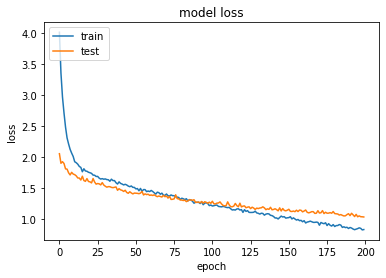

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('..//Pictures//Loss_Model.png') 
plt.show()

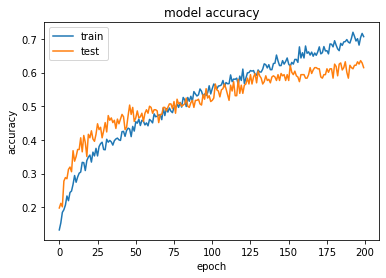

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('..//Pictures//Accuracy_Model.png') 
plt.show()

In [ ]:
loss,acc = model.evaluate(mfcc_test, emotions_test)
print("The accuracy of trained model is :{:5.2f}%".format(100*acc))

9/9 [==============================] - 0s 5ms/step - loss: 1.0366 - accuracy: 0.6146
The accuracy of trained model is :61.46%


In [ ]:
model.save('/content/drive/MyDrive/speech-emotion/CNN_Model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(new_Ytest, predictions)
print(report)

In [ ]:
#Saving our trained model as CNN_Model.h5

model.save('CNN_Model.h5')
print("MODEL SAVED")

In [ ]:
our_model=keras.models.load_model('CNN_Model.h5')

In [ ]:
loss, acc = our_model.evaluate(mfcc_test, emotions_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [51]:
import keras
import numpy as np
import librosa
import soundfile as sf

In [54]:
class modelPredictions:

    def __init__(self, path, file):
        self.path = path
        self.file = file

    def load_model(self):
        self.loaded_model = keras.models.load_model(self.path)
        #return self.loaded_model.summary()

    def predictEmotion(self):
        data, sr = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
        predictedEmotion = self.loaded_model.predict(x)
        predict_classes=np.argmax(predictedEmotion,axis=1)
        #print("The predicted emotion is : ", " ", predict_classes)
        print("The predicted emotion is : ", " ", self.convertclasstoemotion(predict_classes))


    @staticmethod
    def convertclasstoemotion(p):
        #predictions(int) to understandable emotion labeling
        label_conversion = {'0': 'neutral','1': 'calm','2': 'happy','3': 'sad','4': 'angry','5': 'fearful','6': 'disgust','7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == p:
                label = value
        return label

In [55]:
#Created the object p of class modelPredictions
p1 = modelPredictions(path='/content/drive/MyDrive/speech-emotion/CNN_Model.h5',file='/content/drive/MyDrive/speech-emotion/data/03-01-01-01-01-01-01.wav')
p1.load_model()
#called predictEmotion function to predict emotion type of input file
p1.predictEmotion()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
The predicted emotion is :    happy


In [56]:
#Created the object p of class modelPredictions
p1 = modelPredictions(path='/content/drive/MyDrive/speech-emotion/CNN_Model.h5',file='/content/drive/MyDrive/speech-emotion03-01-01-01-02-01-01.wav')
p1.load_model()
#called predictEmotion function to predict emotion type of input file
p1.predictEmotion()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
The predicted emotion is :    neutral


In [57]:
#Created the object p of class modelPredictions
p1 = modelPredictions(path='/content/drive/MyDrive/speech-emotion/CNN_Model.h5',file='/content/drive/MyDrive/speech-emotion03-01-04-01-01-02-01.wav')
p1.load_model()
#called predictEmotion function to predict emotion type of input file
p1.predictEmotion()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
The predicted emotion is :    neutral
